**NOTEBOOK EXPERIMENTAL**

No se han sacado resultados todavía

**Trabajo de Fin de Grado**  
- Autor: Pablo González Martín  
- Director: Carlos Javier Pérez González

Grado en Matemáticas  
Universidad de La Laguna  
2024/25

Este notebook forma parte del Trabajo de Fin de Grado titulado *“Fundamentos de las redes neuronales
convolucionales y su aplicación en la
detección de enfermedades oculares”*, cuyo objetivo es desarrollar un modelo de clasificación de enfermedades oculares a partir de imágenes médicas.

En este notebook se recorre un ejemplo complementario de un clasificador de gravedad de la enfermedad retinopatía diabética.


# Imports

In [1]:
!pip install keras_visualizer

In [2]:
import os
import torch
import sys
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import defaultdict
import keras
from keras import layers
from tensorflow.keras import layers, callbacks
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from keras_visualizer import visualizer
from IPython.display import Image
from tensorflow.keras.utils import plot_model   #descargar graphicz
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD, Adamax
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy

In [3]:
from funcionalidades import *

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
sys.version

Num GPUs Available:  1
2.18.0


'3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]'

**IMPORTANTE** En caso de no tener GPU habilitada no ejecutar las celdas de las secciones de *Modelo Custom* ya que puede tardar mucho.

## Google Colab + Drive

**CASO USANDO DRIVE Y GOOGLE COLAB**. Incluir la carpeta con nombre dataset en MiUnidad en el Drive (en caso de tener los datos en local, declarar path como la ruta a la carpeta dataset) junto con funcionalidades.py.

In [5]:
path = os.path.join(os.getcwd(),'drive','MyDrive', 'dataset_retinopatia_diabetica')

Montar Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset en local en esta carpeta

In [ ]:
path=os.path.join(os.getcwd(),'dataset_retinopatia_diabetica')

# Data estraction

In [7]:
class_names = ['no_DR', 'mild', 'moderate', 'proliferative', 'severe']

In [8]:
dir = os.getcwd()
path_dataset = path


# Rutas a los conjuntos de entrenamiento y prueba
train_path = os.path.join(path_dataset, 'train')
test_path = os.path.join(path_dataset, 'test')

# Listar subcarpetas en train y test
train_carpetas = [
    os.path.join(train_path,carpeta) for carpeta in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, carpeta))
]

test_carpetas = [
    os.path.join(test_path,carpeta) for carpeta in os.listdir(test_path)
    if os.path.isdir(os.path.join(test_path, carpeta))
]

print("Carpetas en train:", train_carpetas)
print("Carpetas en test:", test_carpetas)

Carpetas en train: ['/content/drive/MyDrive/dataset_retinopatia_diabetica/train/severe', '/content/drive/MyDrive/dataset_retinopatia_diabetica/train/proliferative', '/content/drive/MyDrive/dataset_retinopatia_diabetica/train/moderate', '/content/drive/MyDrive/dataset_retinopatia_diabetica/train/no_DR', '/content/drive/MyDrive/dataset_retinopatia_diabetica/train/mild']
Carpetas en test: ['/content/drive/MyDrive/dataset_retinopatia_diabetica/test/no_DR', '/content/drive/MyDrive/dataset_retinopatia_diabetica/test/severe', '/content/drive/MyDrive/dataset_retinopatia_diabetica/test/proliferative', '/content/drive/MyDrive/dataset_retinopatia_diabetica/test/moderate', '/content/drive/MyDrive/dataset_retinopatia_diabetica/test/mild']


Renombrar imágenes. Caso de trabajar en local

In [ ]:
for carpeta in train_carpetas:
    renombrar_imagenes(carpeta)
for carpeta in test_carpetas:
    renombrar_imagenes(carpeta)

Tarda bastante

In [13]:
dataset_analysis(os.path.join(path_dataset,'train'))


Analyzing Subfolder: severe

Subfolder Summary - severe:
Total Images: 698

Image Formats:
  - PNG: 698 images (100.00%)

Color Modes:
  - RGB: 698 images (100.00%)

Bit Depths:
  - 24 bit: 698 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: proliferative

Subfolder Summary - proliferative:
Total Images: 566

Image Formats:
  - PNG: 566 images (100.00%)

Color Modes:
  - RGB: 566 images (100.00%)

Bit Depths:
  - 24 bit: 566 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: moderate

Subfolder Summary - moderate:
Total Images: 4234

Image Formats:
  - PNG: 4234 images (100.00%)

Color Modes:
  - RGB: 4234 images (100.00%)

Bit Depths:
  - 24 bit: 4234 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: no_DR

Subfolder Summary - no_DR:
Total Images: 20648

Image Formats:
  - PNG: 20648 imag

Tarda menos

In [12]:
dataset_analysis(os.path.join(path_dataset,'test'))


Analyzing Subfolder: no_DR

Subfolder Summary - no_DR:
Total Images: 5162

Image Formats:
  - PNG: 5162 images (100.00%)

Color Modes:
  - RGB: 5162 images (100.00%)

Bit Depths:
  - 24 bit: 5162 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: severe

Subfolder Summary - severe:
Total Images: 175

Image Formats:
  - PNG: 175 images (100.00%)

Color Modes:
  - RGB: 175 images (100.00%)

Bit Depths:
  - 24 bit: 175 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: proliferative

Subfolder Summary - proliferative:
Total Images: 142

Image Formats:
  - PNG: 142 images (100.00%)

Color Modes:
  - RGB: 142 images (100.00%)

Bit Depths:
  - 24 bit: 142 images (100.00%)

Dimension Ranges:
  - Width:  224 - 224 pixels
  - Height: 224 - 224 pixels

Analyzing Subfolder: moderate

Subfolder Summary - moderate:
Total Images: 1058

Image Formats:
  - PNG: 1058 images

Observamos que las clases no están distribuidas de forma equitativa

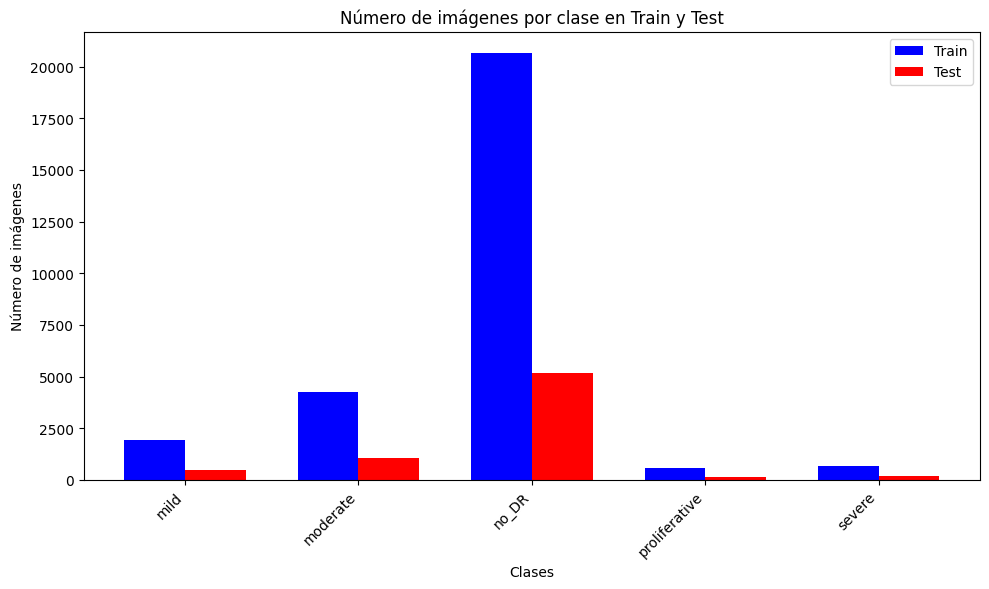

In [11]:
plot_image_counts(path_dataset)

Tamaño del lote y otras características

In [14]:
directory=os.path.join(path_dataset, 'train')
label_mode="int"
color_mode="rgb"
batch_size=32
image_size=(224, 224)
seed=42
validation_split=0.2

In [15]:
train_ds = keras.utils.image_dataset_from_directory(
        directory=directory,
        labels="inferred",
        label_mode=label_mode,
        class_names=class_names,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=image_size,
        seed=seed,
        validation_split=validation_split,
        subset="training",
        interpolation="bilinear",
        shuffle=True,
        verbose=False
    )
val_ds = keras.utils.image_dataset_from_directory(
        directory=directory,
        labels="inferred",
        label_mode=label_mode,
        class_names=class_names,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=image_size,
        seed=seed,
        validation_split=validation_split,
        subset="validation",
        interpolation="bilinear",
        shuffle=True,
        verbose=False
    )


Using 22481 files for training.
Using 5620 files for validation.


In [16]:
# Mostrar la distribución de clases para los datasets de entrenamiento y validación
print("Distribución de clases en el conjunto de entrenamiento:")
show_class_distribution(train_ds,class_names=class_names)

print("\nDistribución de clases en el conjunto de validación:")
show_class_distribution(val_ds,class_names=class_names)

Distribución de clases en el conjunto de entrenamiento:
Distribución de clases:
no_DR: 16576 (73.73%)
mild: 1576 (7.01%)
moderate: 3328 (14.80%)
proliferative: 451 (2.01%)
severe: 550 (2.45%)

Distribución de clases en el conjunto de validación:
Distribución de clases:
no_DR: 4072 (72.46%)
mild: 379 (6.74%)
moderate: 906 (16.12%)
proliferative: 115 (2.05%)
severe: 148 (2.63%)


In [17]:
test_ds = keras.utils.image_dataset_from_directory(
        directory=os.path.join(path_dataset, 'test'),
        labels="inferred",
        label_mode=label_mode,
        class_names=class_names,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=image_size,
        seed=seed,
        validation_split=validation_split,
        subset="training",
        interpolation="bilinear",
        shuffle=True,
        verbose=False
    )

Using 5620 files for training.


In [18]:
print("\nDistribución de clases en el conjunto de test:")
show_class_distribution(test_ds,class_names=class_names)


Distribución de clases en el conjunto de test:
Distribución de clases:
no_DR: 4140 (73.67%)
mild: 379 (6.74%)
moderate: 848 (15.09%)
proliferative: 115 (2.05%)
severe: 138 (2.46%)


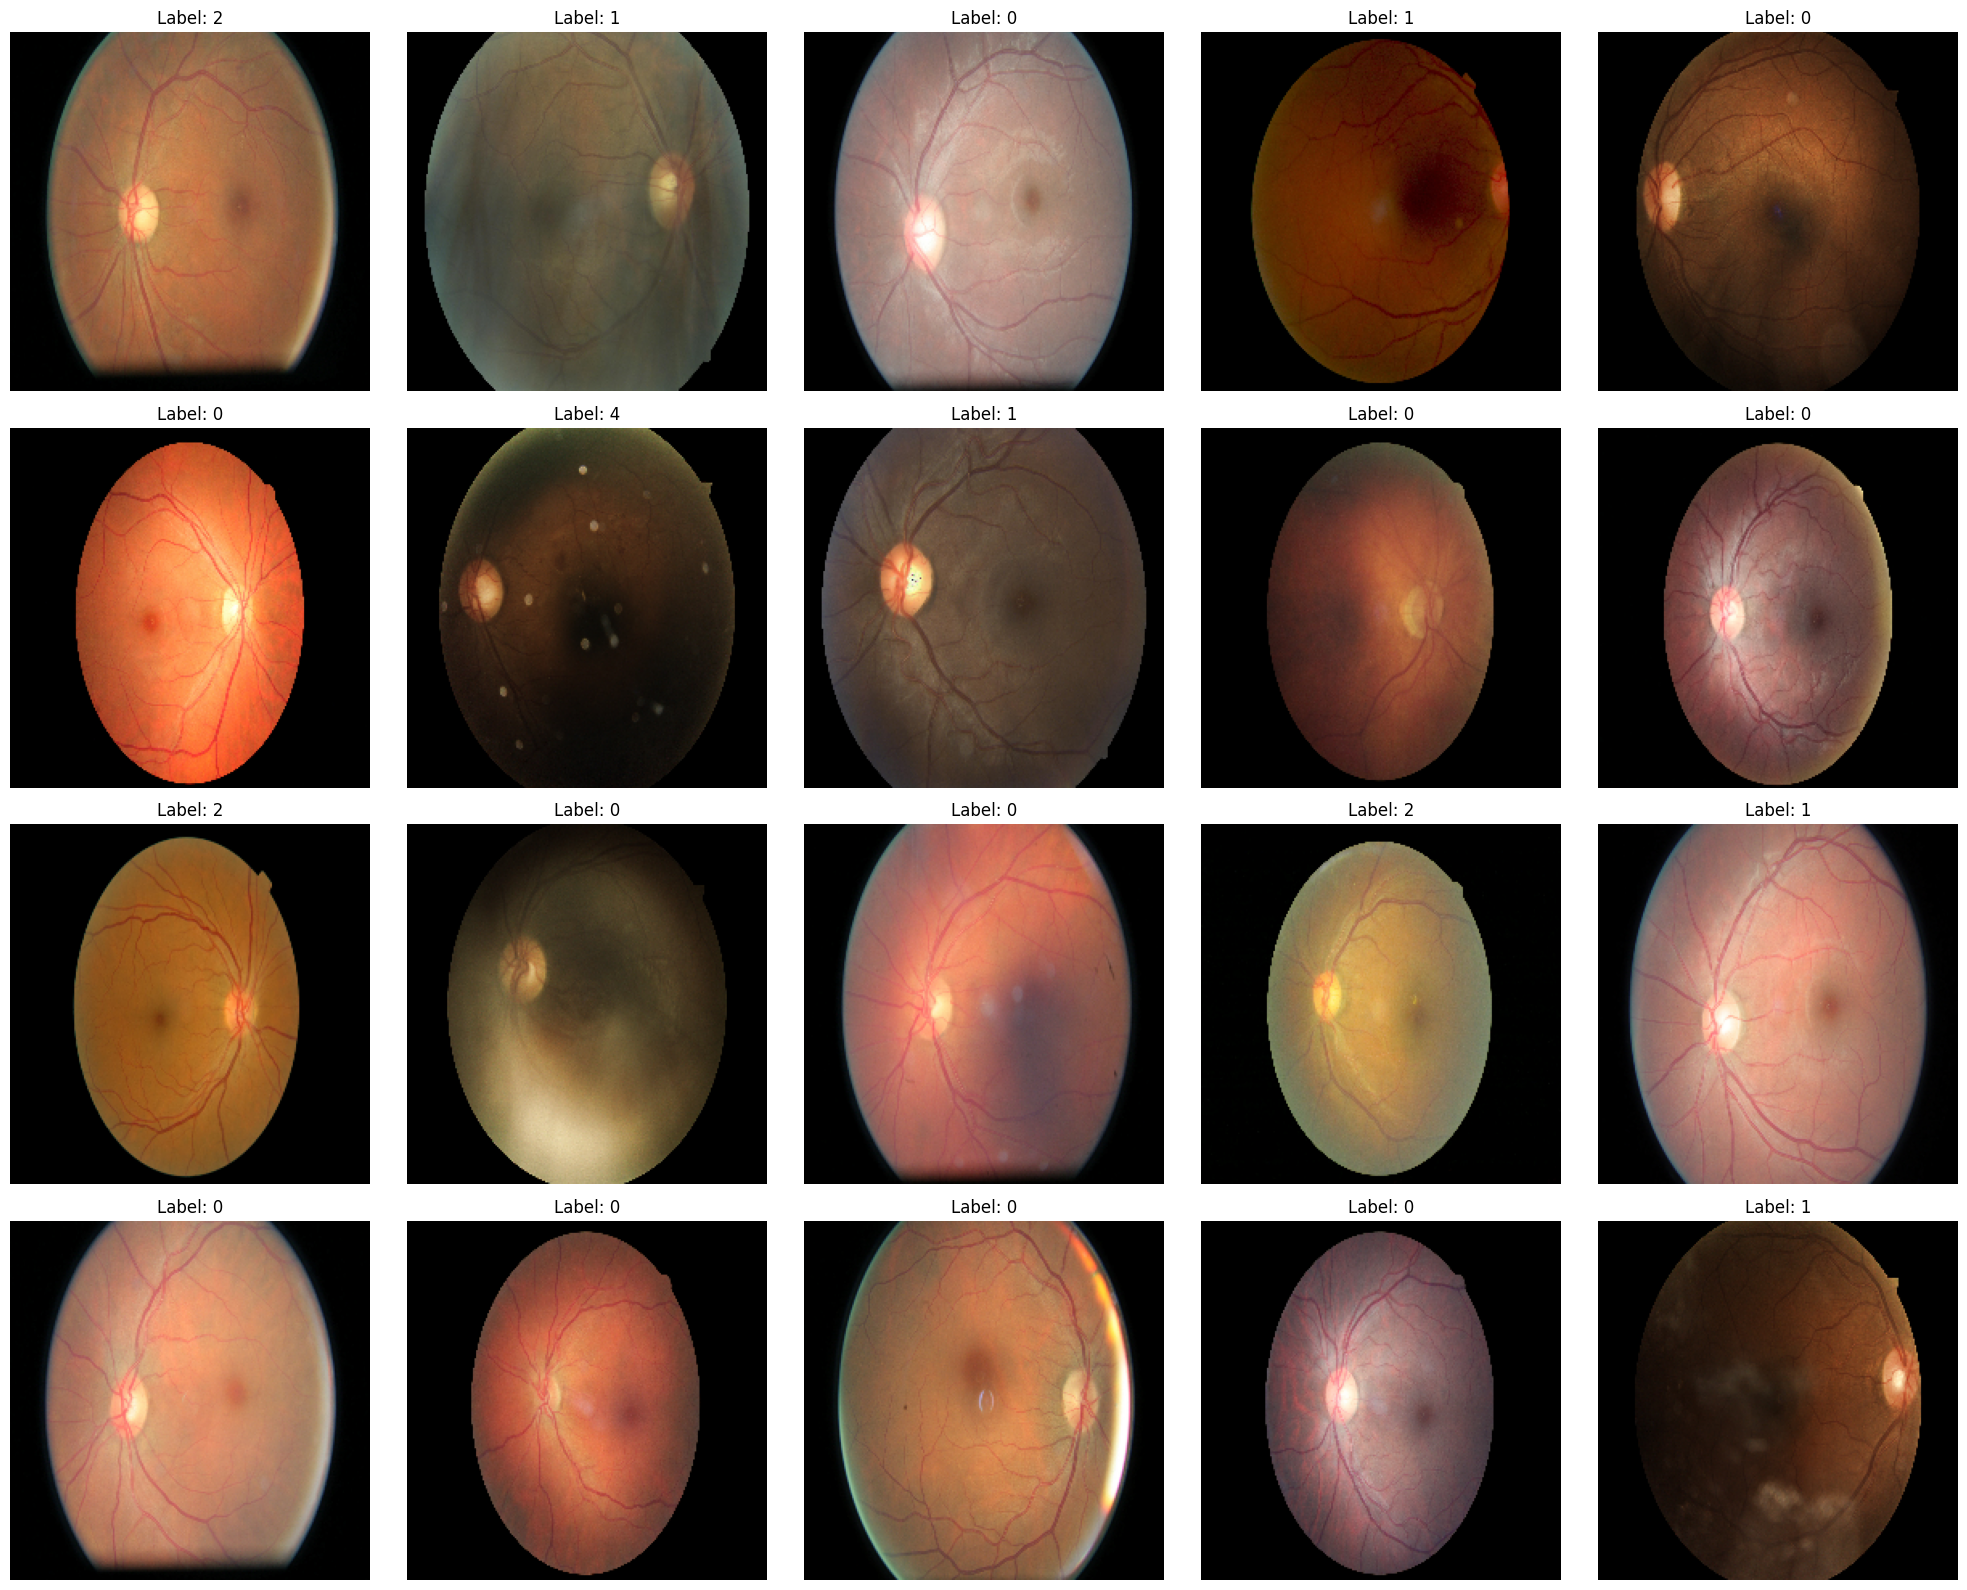

In [19]:
show_random_images(train_ds, num_images=20, images_per_row=5)

# Modelo custom

In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [53]:
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def calculate_class_weights(train_ds, class_names=None):
    """
    Calculate class weights from a TensorFlow dataset.

    Parameters:
    train_ds: TensorFlow dataset created with image_dataset_from_directory
    class_names: List of class names corresponding to the class indices

    Returns:
    dict: Dictionary mapping class indices to class weights
    """
    # Extract all labels from the dataset
    labels = []

    # Iterate through the dataset to collect all labels
    for images, batch_labels in train_ds:
        labels.extend(batch_labels.numpy())

    # Convert to numpy array
    labels = np.array(labels)

    # Get unique classes
    classes = np.unique(labels)

    # Compute class weights
    weights = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=labels
    )

    # Create dictionary mapping class indices to weights
    class_weights = {i: weight for i, weight in zip(classes, weights)}

    # Count samples per class
    class_counts = {}
    for label in labels:
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1

    # Calculate total samples
    total_samples = len(labels)

    # Print class weights with class names and distribution info
    print("\nClass distribution and weights:")
    print("-" * 80)
    print(f"{'Index':<8} {'Class Name':<25} {'Count':<10} {'Percentage':<15} {'Weight':<10}")
    print("-" * 80)

    for class_idx, weight in class_weights.items():
        count = class_counts[class_idx]
        percentage = (count / total_samples) * 100

        if class_names and class_idx < len(class_names):
            class_name = class_names[class_idx]
        else:
            class_name = f"Class {class_idx}"

        print(f"{class_idx:<8} {class_name:<25} {count:<10} {percentage:.2f}%{'':<8} {weight:.4f}")

    print("-" * 80)
    print(f"Total samples: {total_samples}")

    return class_weights

Los pesos no tienen porque sumar 1 (consultar documentación)

In [55]:
class_weights=calculate_class_weights(train_ds,class_names=class_names)


Class distribution and weights:
--------------------------------------------------------------------------------
Index    Class Name                Count      Percentage      Weight    
--------------------------------------------------------------------------------
0        no_DR                     16576      73.73%         0.2712
1        mild                      1576       7.01%         2.8529
2        moderate                  3328       14.80%         1.3510
3        proliferative             451        2.01%         9.9694
4        severe                    550        2.45%         8.1749
--------------------------------------------------------------------------------
Total samples: 22481


In [58]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import layers, models, regularizers

def build_cnn(input_shape=(224, 224, 3), num_classes=5):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Block 4
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Global Average Pooling + Dense
        layers.GlobalAveragePooling2D(),
        layers.Dense(2500, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


In [59]:
model = build_cnn(input_shape=(224, 224, 3), num_classes=len(class_names))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 224, 224, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 224, 224, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,385,773 (5.29 MB)

 Trainable params: 1,378,725 (5.26 MB)

 Non-trainable params: 7,048 (27.53 KB)

In [60]:
learning_rate = 0.002  # Puedes cambiar este valor al que desees
momentum = 0.9        # El momentum ayuda a acelerar el entrenamiento y suavizar los gradientes

metrics=[
    'sparse_categorical_accuracy',
    SparseTopKCategoricalAccuracy(k=2, name='top2_accuracy'),
    SparseTopKCategoricalAccuracy(k=3, name='top3_accuracy')
]

model.compile(
    #optimizer=Adam(learning_rate=learning_rate),  # Aquí se establece el learning rate
    #optimizer=SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True),
    optimizer=Adamax(),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=metrics
)

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definir callback para guardar el mejor modelo
model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(os.getcwd(),'best_model_retinopatia.keras'),  # Ruta donde se guardará el modelo
    monitor='val_sparse_categorical_accuracy',        # Métrica para monitorizar (puedes usar 'val_accuracy' si prefieres)
    save_best_only=True,       # Guarda solo el mejor modelo según la métrica
    save_weights_only=False,   # Guarda el modelo completo (estructura y pesos)
    mode='min',                # 'min' significa que se guardará el modelo con la menor pérdida de validación
    verbose=1                  # Imprimir un mensaje cuando el modelo sea guardado
)

early_stopping = EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=10,
    restore_best_weights=True
)
# Entrenar el modelo
history = model.fit(
    train_ds,  # Tu generador de datos de entrenamiento
    epochs=30,
    validation_data=val_ds,  # Tu generador de validación
    class_weight=class_weights,
    callbacks=[model_checkpoint_callback, early_stopping]
)

Epoch 1/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 2.6881 - sparse_categorical_accuracy: 0.1799 - top2_accuracy: 0.3966 - top3_accuracy: 0.6116
Epoch 1: val_sparse_categorical_accuracy improved from inf to 0.12135, saving model to /content/best_model_retinopatia.keras
703/703 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - loss: 2.6879 - sparse_categorical_accuracy: 0.1799 - top2_accuracy: 0.3966 - top3_accuracy: 0.6116 - val_loss: 2.4192 - val_sparse_categorical_accuracy: 0.1214 - val_top2_accuracy: 0.4477 - val_top3_accuracy: 0.7447
Epoch 2/30
702/703 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.3817 - sparse_categorical_accuracy: 0.1953 - top2_accuracy: 0.4230 - top3_accuracy: 0.6428
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.12135
703/703 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - loss: 2.3814 - sparse_categorical_accuracy: 0.1953 - top2_accuracy: 0.4230 - top3_accuracy: 0.6428 - val_loss: 1.8932 - val_sparse_categorical_accuracy: 0.2984 - val_top2_accuracy: 0.6674 - v

In [63]:
import matplotlib.pyplot as plt

def plot_multiple_metrics(history, metrics_list, figsize=(13, 6)):
    """
    Plot multiple training and validation metrics from a model history.

    Parameters:
    history: The history object returned from model.fit()
    metrics_list (list): List of metric names to plot
    figsize (tuple): Size of the figure (width, height)

    Returns:
    None: Displays the plot
    """
    plt.figure(figsize=figsize)

    # Define colors and markers for better visualization
    colors = {
        'train': ['#E74C3C', '#2ECC71', '#3498DB'],
        'val': ['#641E16', '#186A3B', '#1B4F72']
    }
    markers = ['o', 's', '^']

    for i, metric in enumerate(metrics_list):
        # Plot training metric
        if metric in history.history:
            plt.plot(
                history.history[metric],
                color=colors['train'][i % len(colors['train'])],
                marker=markers[i % len(markers)],
                label=f'Train {metric}'
            )

        # Plot validation metric
        val_metric = f'val_{metric}'
        if val_metric in history.history:
            plt.plot(
                history.history[val_metric],
                color=colors['val'][i % len(colors['val'])],
                marker=markers[i % len(markers)],
                linestyle='--',
                label=f'Val {metric}'
            )

    plt.title('Model Metrics')
    plt.ylabel('Score')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

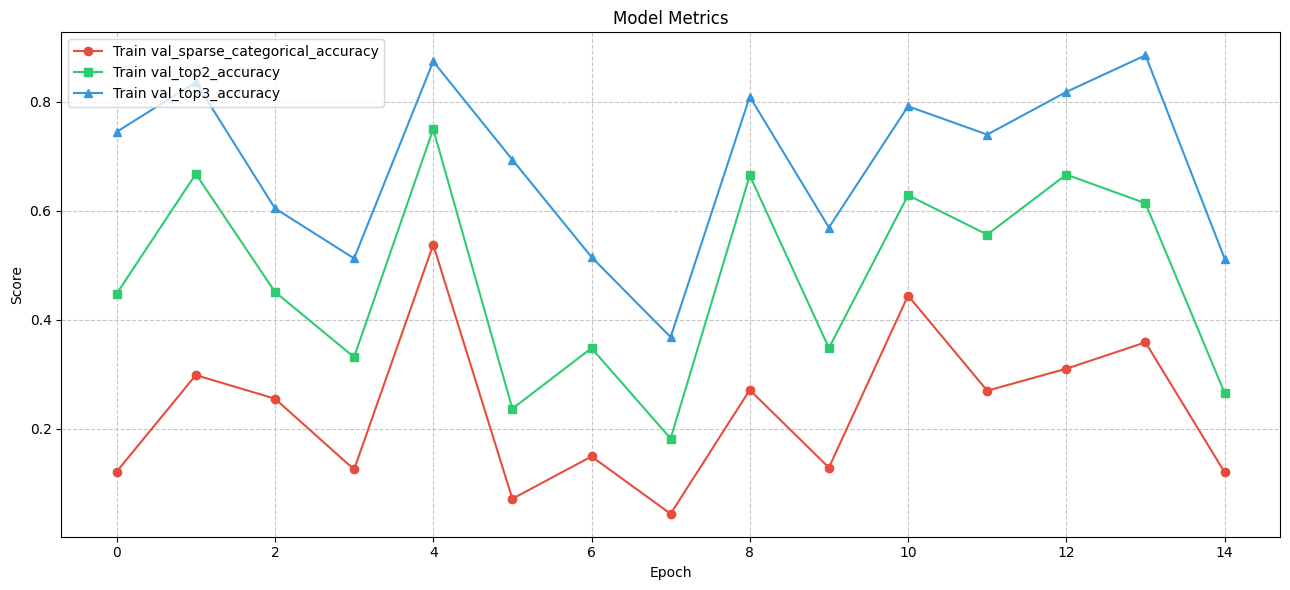

In [64]:
# Define your metrics list
metrics_to_plot = [
    'val_sparse_categorical_accuracy',
    'val_top2_accuracy',
    'val_top3_accuracy'
]

# Call the plotting function
plot_multiple_metrics(history, metrics_to_plot)

# Visualizar resultados

Modelo entrenado

In [65]:
nombre_modelo = 'best_model_retinopatia.keras'
model = keras.models.load_model(nombre_modelo)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 224, 224, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 224, 224, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,143,225 (15.81 MB)

 Trainable params: 1,378,725 (5.26 MB)

 Non-trainable params: 7,048 (27.53 KB)

 Optimizer params: 2,757,452 (10.52 MB)

Reporte de clasificación para test:
               precision    recall  f1-score     support
no_DR           0.835938  0.025845  0.050141  4140.00000
mild            0.064725  0.052770  0.058140   379.00000
moderate        0.075829  0.018868  0.030217   848.00000
proliferative   0.020183  0.286957  0.037714   115.00000
severe          0.022775  0.550725  0.043741   138.00000
accuracy        0.044840  0.044840  0.044840     0.04484
macro avg       0.203890  0.187033  0.043991  5620.00000
weighted avg    0.632576  0.044840  0.047262  5620.00000


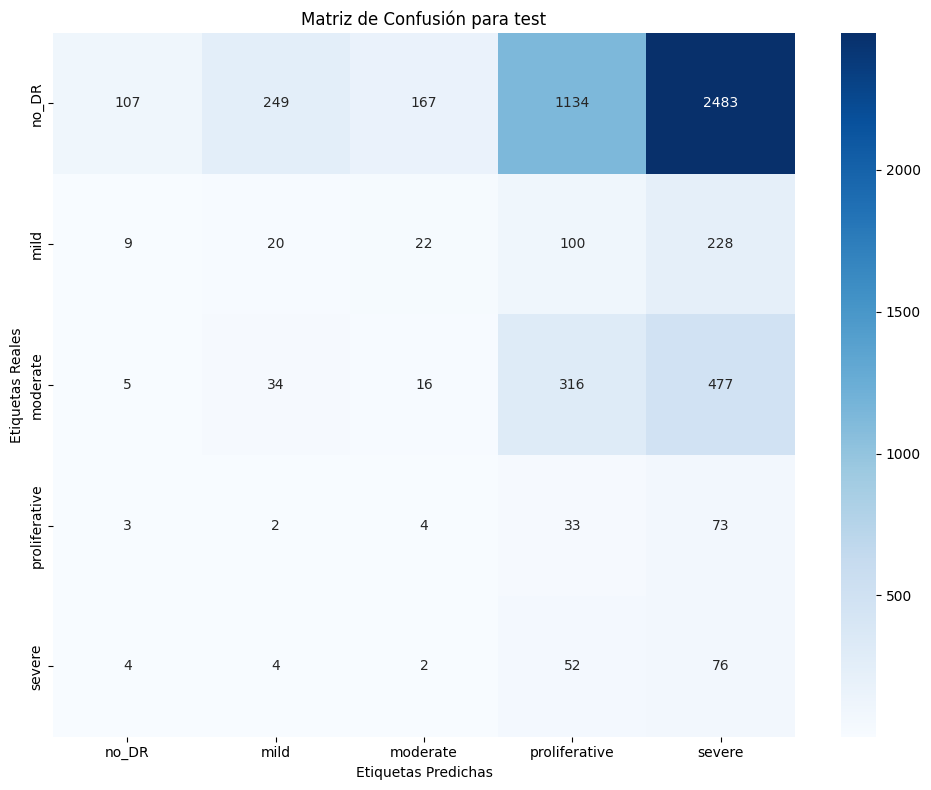

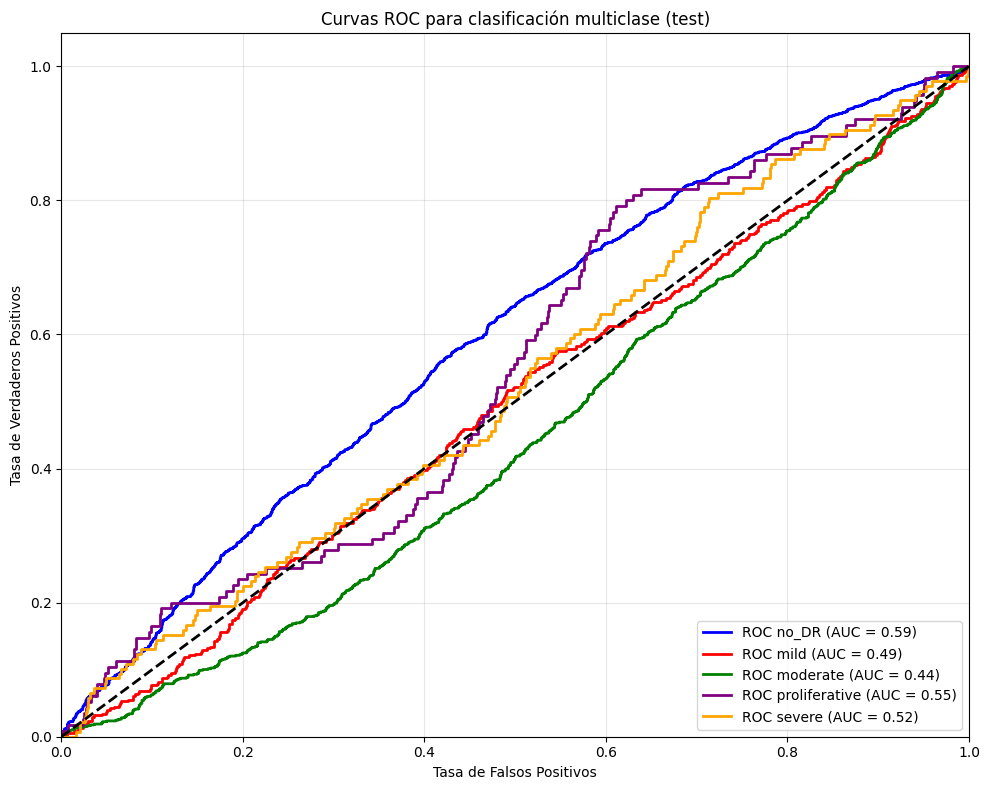

{'accuracy': 0.044839857651245554,
 'macro_avg_precision': 0.20389004735526517,
 'macro_avg_recall': 0.18703298862508475,
 'macro_avg_f1': 0.04399051897704377,
 'weighted_avg_f1': 0.04726236031013189,
 'no_DR_precision': 0.8359375,
 'no_DR_recall': 0.025845410628019323,
 'no_DR_f1': 0.05014058106841612,
 'no_DR_auc': np.float64(0.59442779736258),
 'mild_precision': 0.06472491909385113,
 'mild_recall': 0.052770448548812667,
 'mild_f1': 0.05813953488372093,
 'mild_auc': np.float64(0.4942107062288965),
 'moderate_precision': 0.07582938388625593,
 'moderate_recall': 0.018867924528301886,
 'moderate_f1': 0.030217186024551465,
 'moderate_auc': np.float64(0.4422323024245204),
 'proliferative_precision': 0.02018348623853211,
 'proliferative_recall': 0.28695652173913044,
 'proliferative_f1': 0.037714285714285714,
 'proliferative_auc': np.float64(0.5457994708367887),
 'severe_precision': 0.022774947557686546,
 'severe_recall': 0.5507246376811594,
 'severe_f1': 0.043741007194244605,
 'severe_auc'

In [66]:
evaluate_model(model, test_ds,class_names, dataset_name="test")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


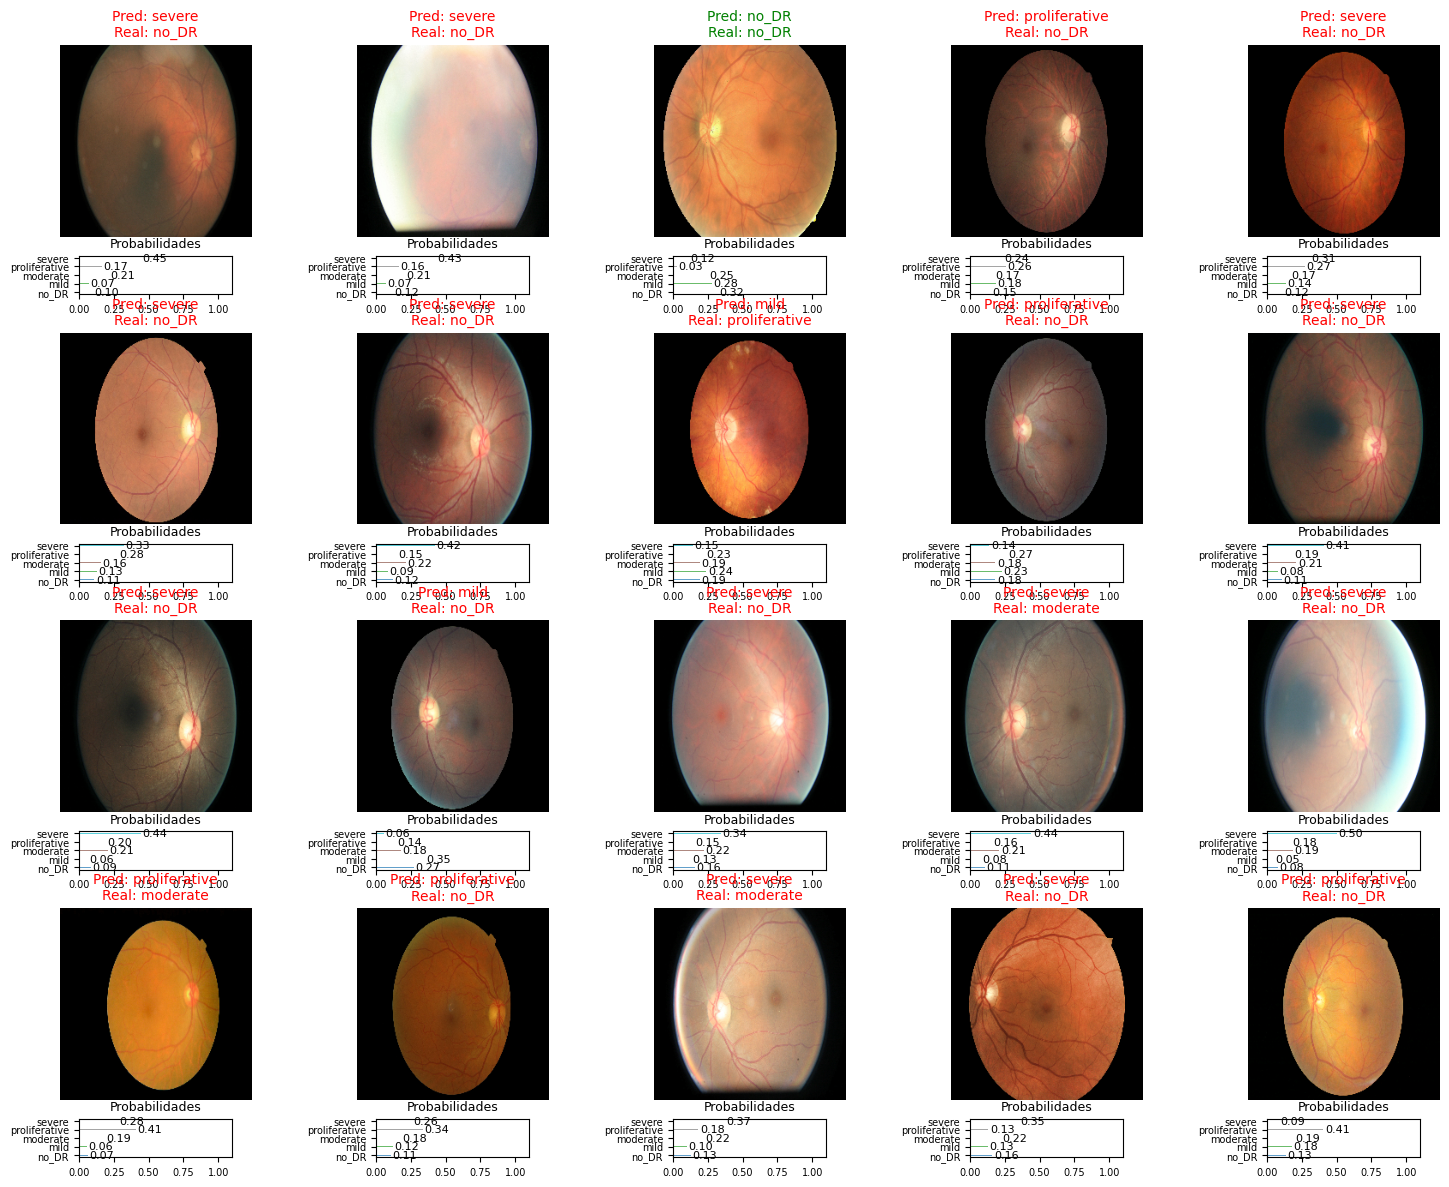

Precisión en las 20 imágenes mostradas: 5.00%

Distribución de clases en la muestra:
  no_DR: 16 imágenes (80.0%)
  moderate: 3 imágenes (15.0%)
  proliferative: 1 imágenes (5.0%)


In [68]:
visualize_predictions(model, test_ds, images_per_row=5, class_names=class_names)